# Objective

    -- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. 
    -- A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Problem statement

    -- An education company named X Education sells online courses to industry professionals. 
    -- The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.
    -- When these people fill up a form providing their email address or phone number, they are classified to be a lead. 
    --Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
    --its lead conversion rate is very poor. 
    -- the company wishes to identify the most potential leads, also known as ‘Hot Leads’

### Importing required Libraries 

In [3]:
# Library to surpase the warnings

import warnings
warnings.filterwarnings(action='ignore')

#library for maths and cleansis

import pandas as pd
import numpy as np

# importing library for data visualisation

import matplotlib.pyplot as plt
import seaborn as sns 

# importing library for logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# importing stats modles

import statsmodels.api as sm

# Importing library for variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing metrics from sklearn for evaluation
from sklearn import metrics



<h2> <span style='color:green ;'> Steps taken to Build the model set</span> </h2>

  <h6> <span>  Exploratory data analysis </span> </h6>
  
      Step-1 : Reading and Understanding data 
      Step-2 : Visualisation of the data 
      Step-3 : Data Preparation

  <h6> <span>  Model building </span> </h6>
      
      Step-4 : Splitting data into Training and Test sets
      Step-5 : Building Logistic Model 
      Step-6 : Prediction
      Step-7 : Model Evaluation
      Step-8 : Optimise Cut off (ROC Curve)
      Step-9 : Prediction on Test 
      step-10: set Precision-Recall 
      step-11: Precision and recall tradeoff 
      step-12: Prediction on Test set
      step-13: checking over all accuracy
      step-14: Conclusion

<h2> <span style='color:DarkBlue ;'> Step-1: Exploratory Data analysis </span> </h2>

In [6]:
df=pd.read_csv('Leads.csv')

In [7]:
df.shape

(9240, 37)

In [8]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [12]:
# check for duplicates 

print(df.duplicated(subset = ['Prospect ID'], keep = False).sum())

print(df.duplicated(subset = ['Lead Number'], keep = False).sum())


0
0


In [13]:
#dropping  Prospect ID & Lead Number  since they have all unique values

df.drop(['Prospect ID', 'Lead Number'],axis=1, inplace = True)

In [14]:
df_null=df.isna().sum()*100/len(df)
df_null.sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [15]:
# Replacing any select data on varibales to Nan values for better analysis

df=df.replace('Select', np.nan)

In [16]:
# checking for any unqiue values so we can drop as we can not impute them 

df.nunique().sort_values(ascending=False)

Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     18
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
Asymmetrique Profile Score                         10
How did you hear about X Education                  9
City                                                6
What is your current occupation                     6
Lead Profile                                        5
Lead Quality                                        5
Lead Origin                                         5
What matters most to you in choosing a course       3
Asymmetrique Profile Index  

In [17]:
# Dropping unique values in  columns
df.drop(['I agree to pay the amount through cheque','Receive More Updates About Our Courses','Magazine',
                           'Update me on Supply Chain Content','Get updates on DM Content'],axis=1,inplace=True)

In [18]:
df.shape

(9240, 30)

In [19]:
df_null=df.isna().sum()*100/len(df)
df_null.sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [20]:
#dropping cols with more than 45% missing values

df.drop(['How did you hear about X Education','Lead Profile', 'Lead Quality','Asymmetrique Profile Score',
                            'Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index',]
        ,axis =1,inplace=True)

In [21]:
df.shape

(9240, 23)

In [22]:
df_null=df.isna().sum()*100/len(df)
df_null.sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Lead Origin                                       0.000000
Newspaper Article                                 0.0000

In [23]:
# replacing the null values with 'Data not available'

df['City'] = df['City'].fillna('not provided')
df['Specialization'] = df['Specialization'].fillna('not provided')
df['Tags'] = df['Tags'].fillna('not provided')
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('not provided')
df['What is your current occupation'] = df['What is your current occupation'].fillna('not provided')
df['Country'] = df['Country'].fillna('not provided')


In [24]:
df_null=df.isna().sum()*100/len(df)
df_null.sort_values(ascending=False)

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Lead Origin                                      0.000000
Newspaper Article                                0.000000
A free copy of Mastering The Interview           0.000000
City                                             0.000000
Tags                                             0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
What is your current occupation                  0.000000
Search                                           0.000000
What matters most to you in choosing a course    0.000000
Specialization                                   0.000000
Country       

In [25]:
df.Country.value_counts()

Country
India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [26]:
# Binning country to India and off-shore

def binning(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "Off Shore"
    return category

df['Country'] = df.apply(lambda x:binning(x['Country']), axis = 1)
df['Country'].value_counts()

Country
India           6492
not provided    2461
Off Shore        287
Name: count, dtype: int64

In [27]:
# imputing Not provided data with India

df['Country'] = df['Country'].replace('not provided','India')
df['Country'].value_counts()

Country
India        8953
Off Shore     287
Name: count, dtype: int64

In [28]:
# Checking the percent of lose if the null values are removed
print(round(100*(sum(df.isnull().sum(axis=1) > 1)/df.shape[0]),2))
df = df[df.isnull().sum(axis=1) <1]

1.48


In [29]:
df_null=df.isna().sum()*100/len(df)
df_null.sort_values(ascending=False)

Lead Origin                                      0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
City                                             0.0
Tags                                             0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What is your current occupation                  0.0
Lead Source                                      0.0
Specialization                                   0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                   

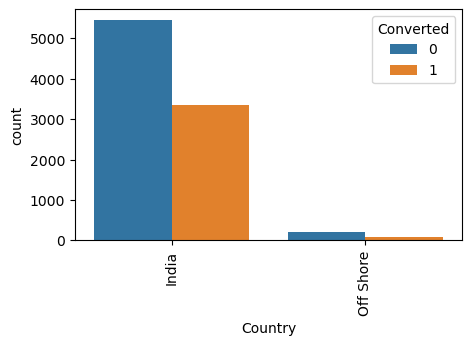

In [30]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(5, 3))
s1 = sns.countplot(x='Country', hue='Converted', data=df)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [31]:
cols_to_drop=['Country']

In [32]:
#checking value counts of "City" column

print(df['City'].value_counts(dropna=False))

City
not provided                   3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: count, dtype: int64


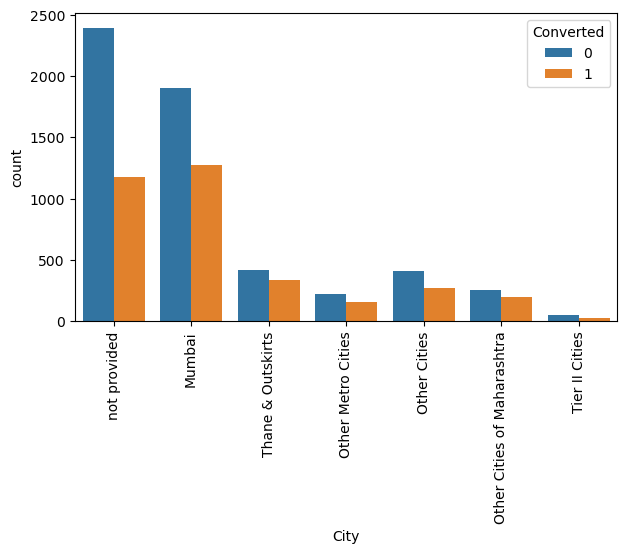

In [33]:
#visualising

plt.figure(figsize=(7,4))
s1=sns.countplot(x='City', hue='Converted',data=df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

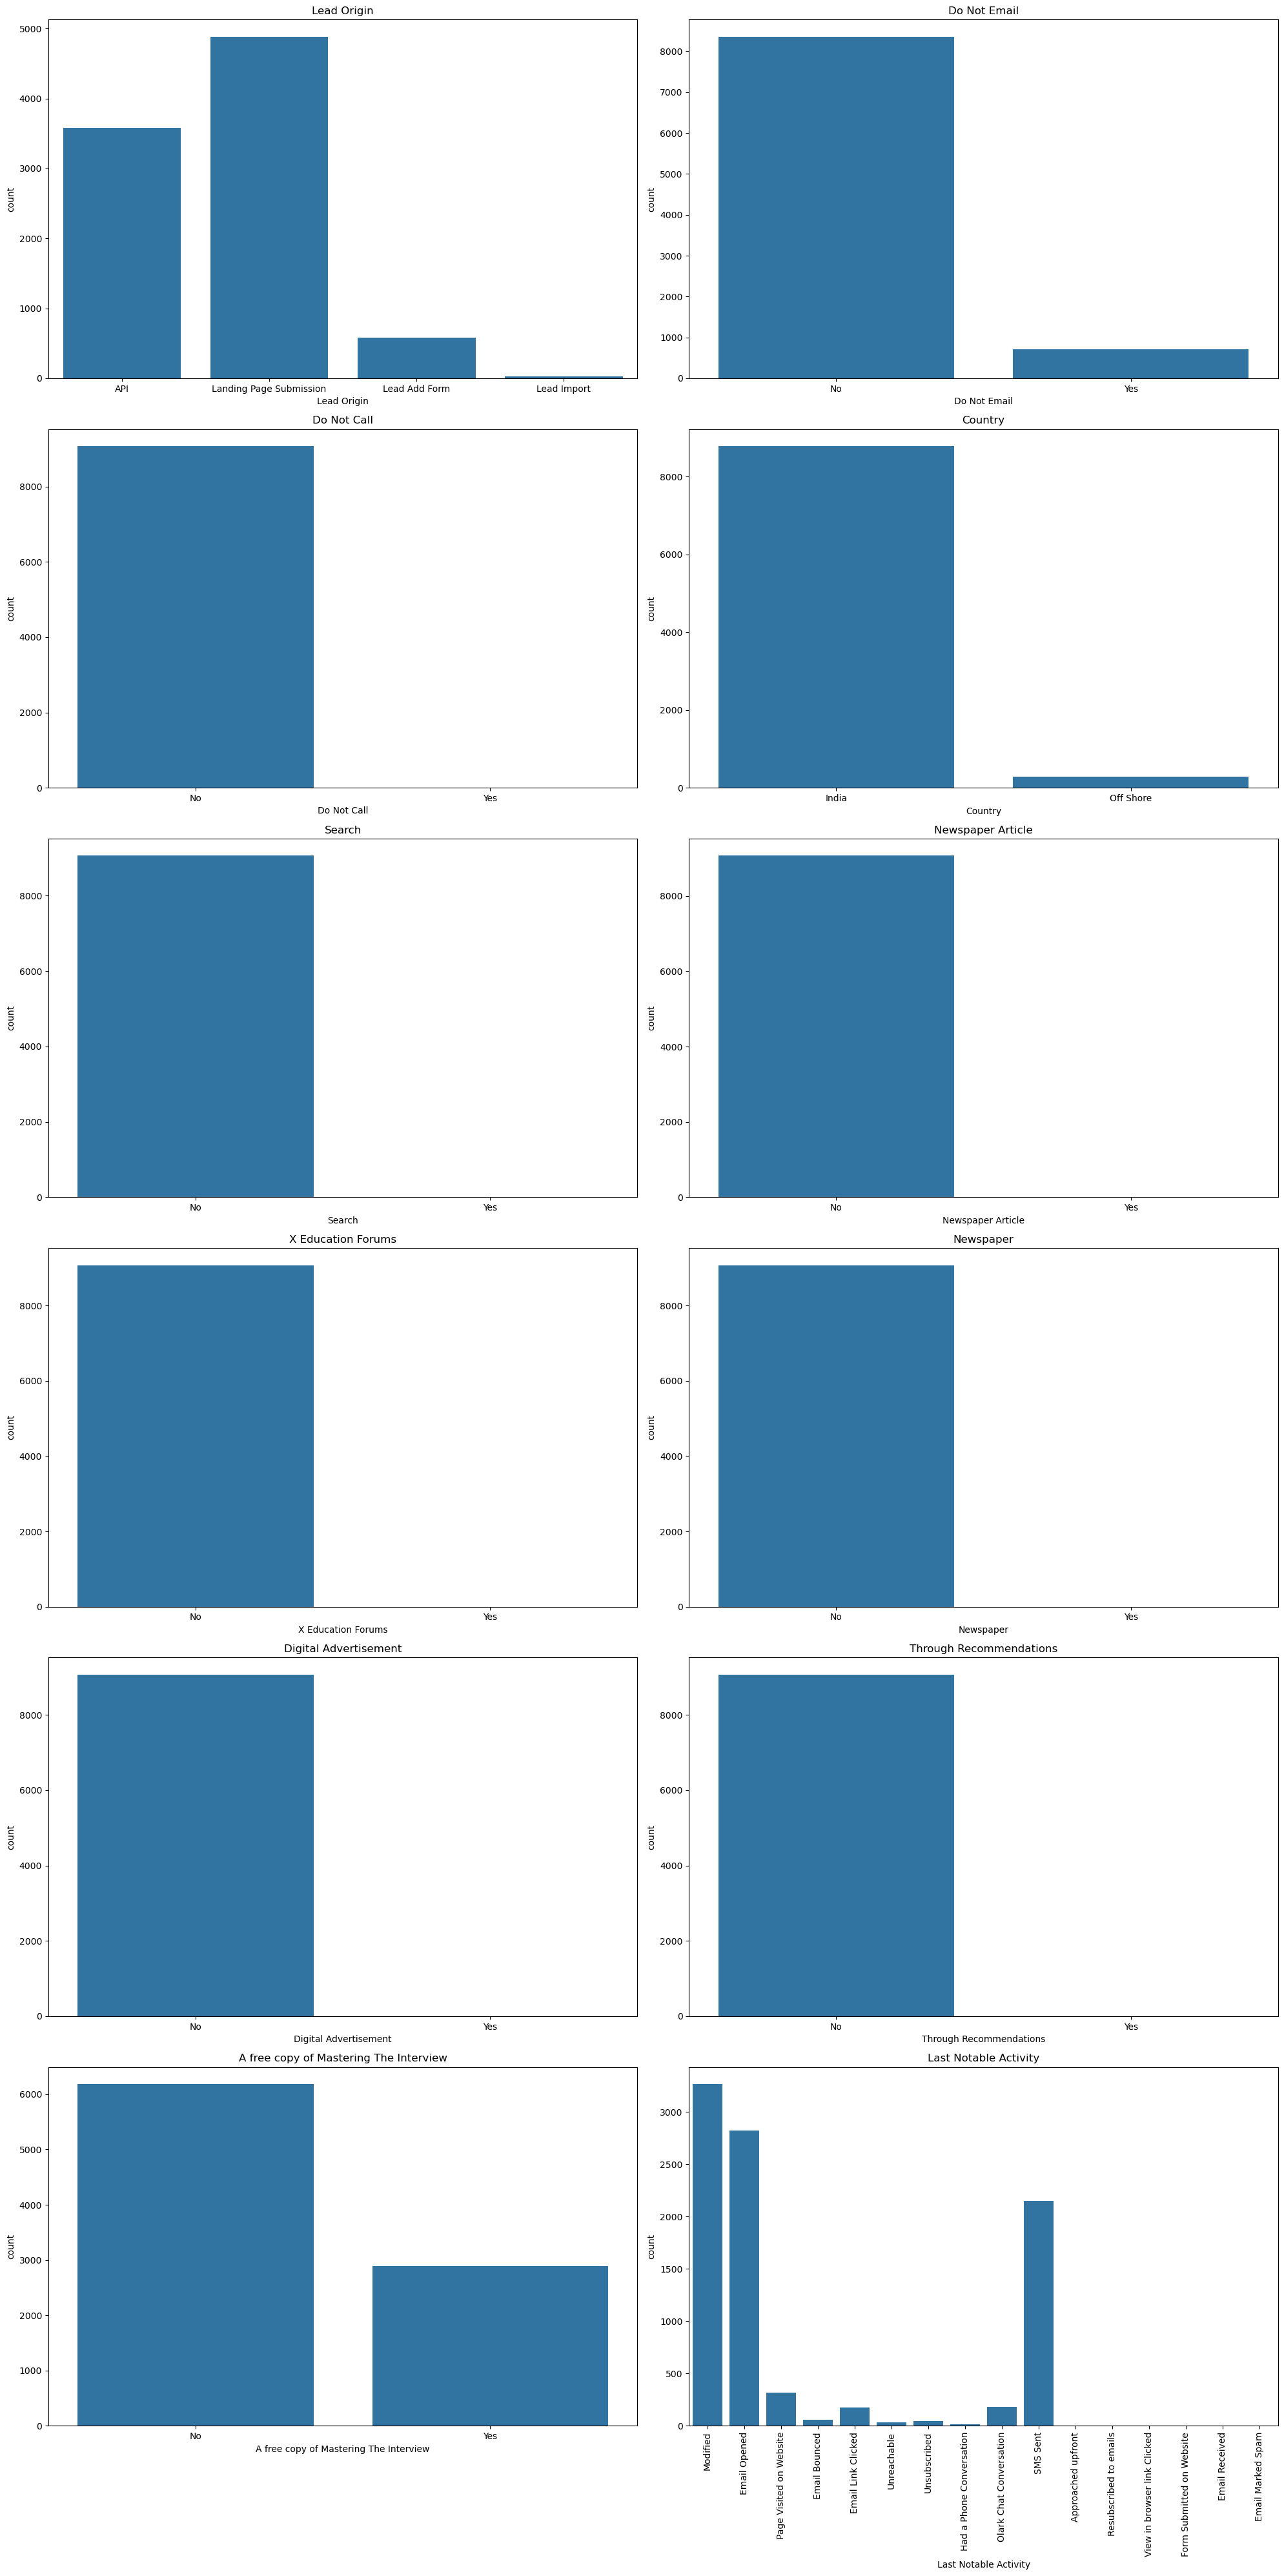

<Figure size 640x480 with 0 Axes>

In [34]:
plt.figure(figsize=(20, 40))

plt.subplot(6, 2, 1)
sns.countplot(x='Lead Origin', data=df)
plt.title('Lead Origin')


plt.subplot(6, 2, 2)
sns.countplot(x='Do Not Email', data=df)
plt.title('Do Not Email')


plt.subplot(6, 2, 3)
sns.countplot(x='Do Not Call', data=df)
plt.title('Do Not Call')

plt.subplot(6, 2, 4)
sns.countplot(x='Country', data=df)
plt.title('Country')

plt.subplot(6, 2, 5)
sns.countplot(x='Search', data=df)
plt.title('Search')

plt.subplot(6, 2, 6)
sns.countplot(x='Newspaper Article', data=df)
plt.title('Newspaper Article')

plt.subplot(6, 2, 7)
sns.countplot(x='X Education Forums', data=df)
plt.title('X Education Forums')

plt.subplot(6, 2, 8)
sns.countplot(x='Newspaper', data=df)
plt.title('Newspaper')

plt.subplot(6, 2, 9)
sns.countplot(x='Digital Advertisement', data=df)
plt.title('Digital Advertisement')

plt.subplot(6, 2, 10)
sns.countplot(x='Through Recommendations', data=df)
plt.title('Through Recommendations')


plt.subplot(6, 2, 11)
sns.countplot(x='A free copy of Mastering The Interview', data=df)
plt.title('A free copy of Mastering The Interview')

plt.subplot(6, 2, 12)
sns.countplot(x='Last Notable Activity', data=df)
plt.title('Last Notable Activity')
plt.xticks(rotation=90)

# Adjust the layout to prevent overlap of labels and titles
plt.tight_layout()

# Show the plot
plt.show()

plt.tight_layout()
plt.show()

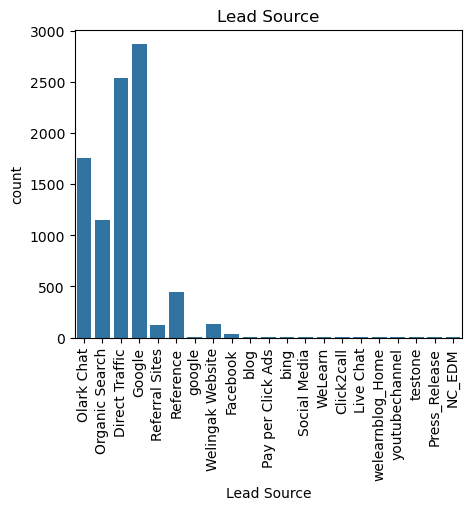

In [35]:
plt.figure(figsize = (5,4))
sns.countplot(x='Lead Source' , data=df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()


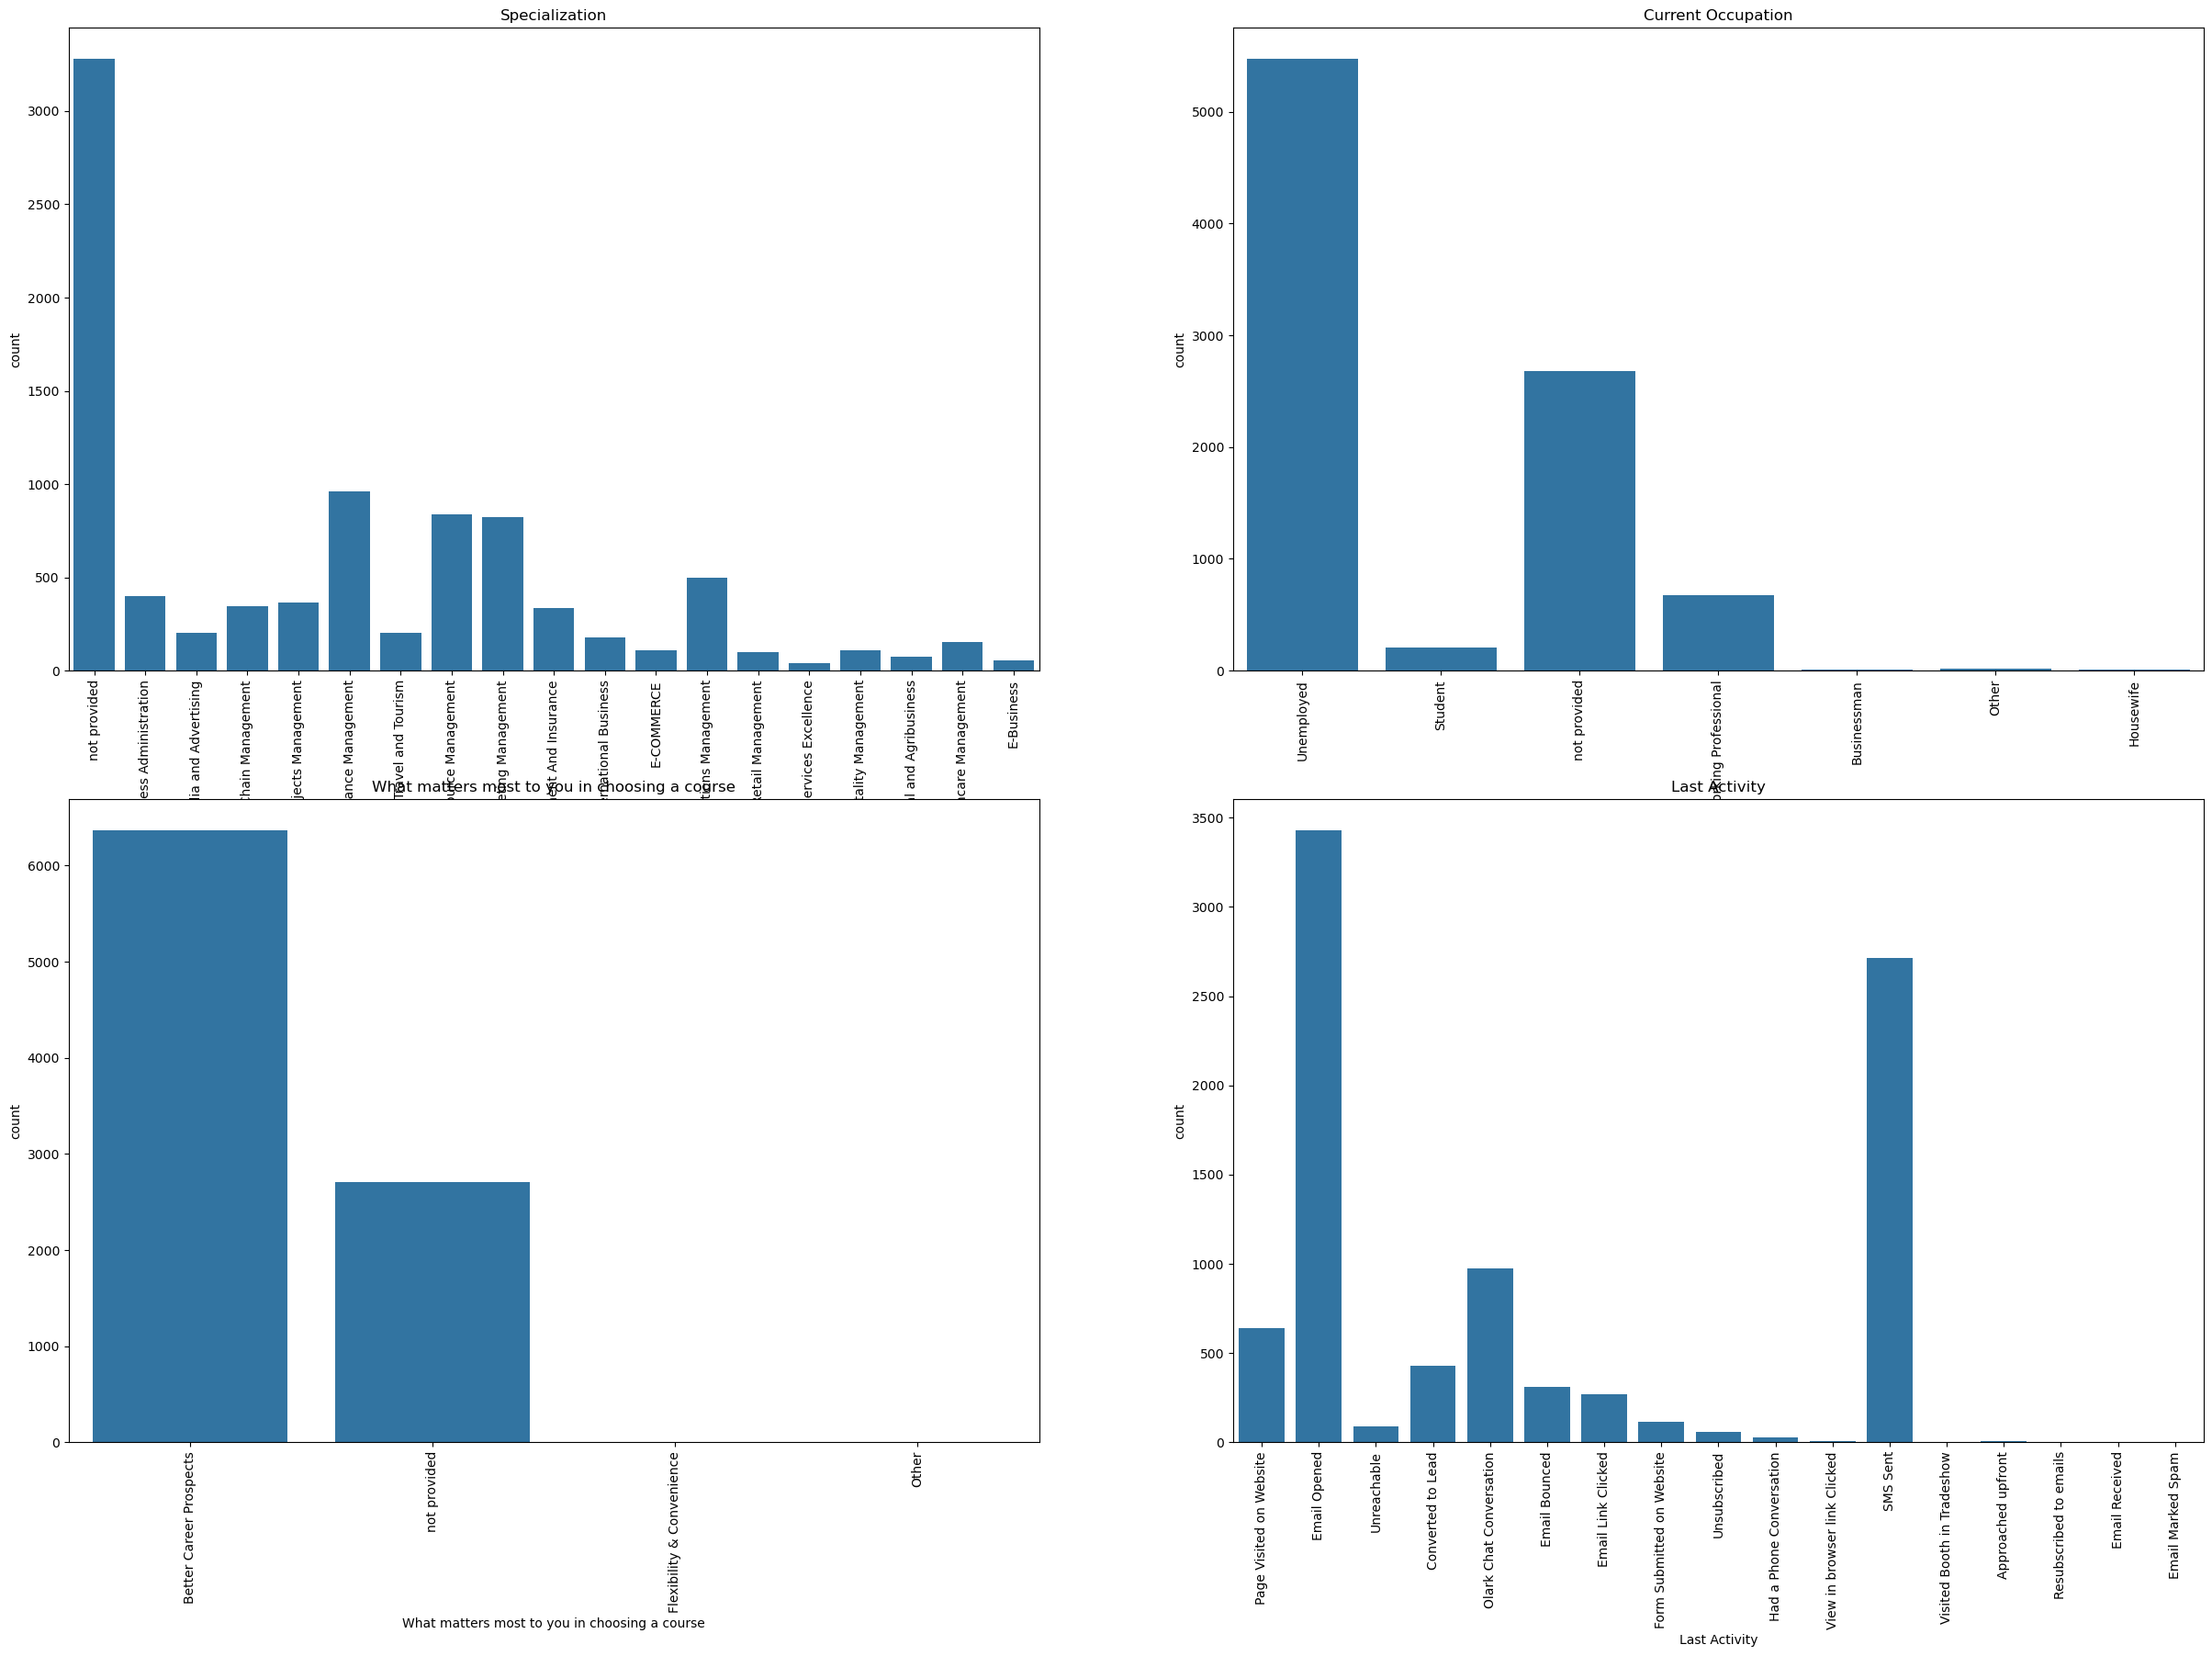

In [36]:
plt.figure(figsize = (30,20))
plt.subplot(2,2,1)
sns.countplot(x='Specialization' , data=df).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(x='What is your current occupation',data=df).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(x='What matters most to you in choosing a course',data=df).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(x='Last Activity',data=df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

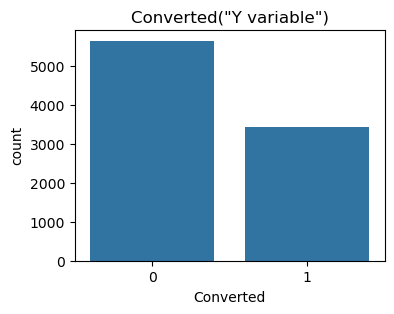

In [37]:
plt.figure(figsize = (4,3))
sns.countplot(x='Converted' , data=df)
plt.title('Converted("Y variable")')
plt.show()

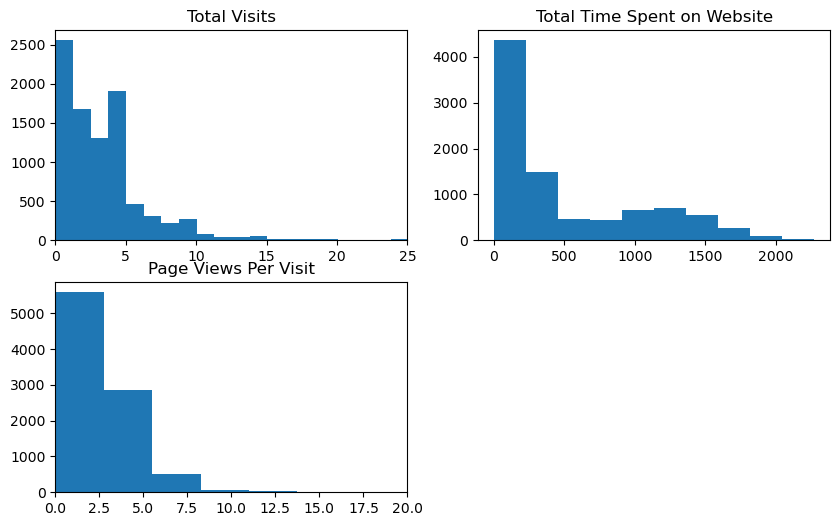

In [38]:

plt.figure(figsize = (10,6))
plt.subplot(221)
plt.hist(df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show( )         

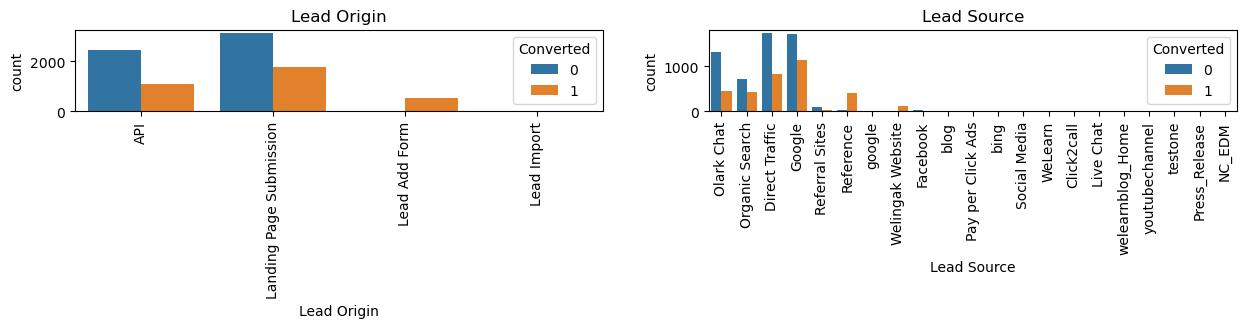

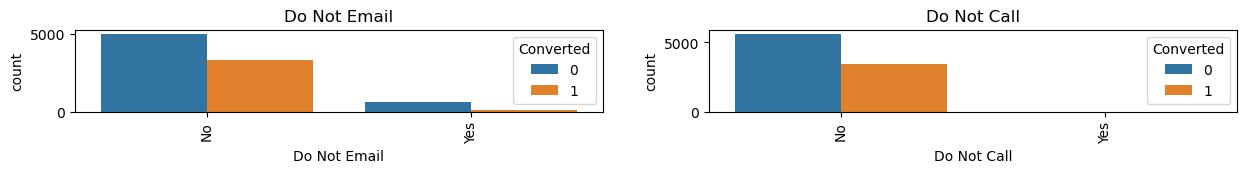

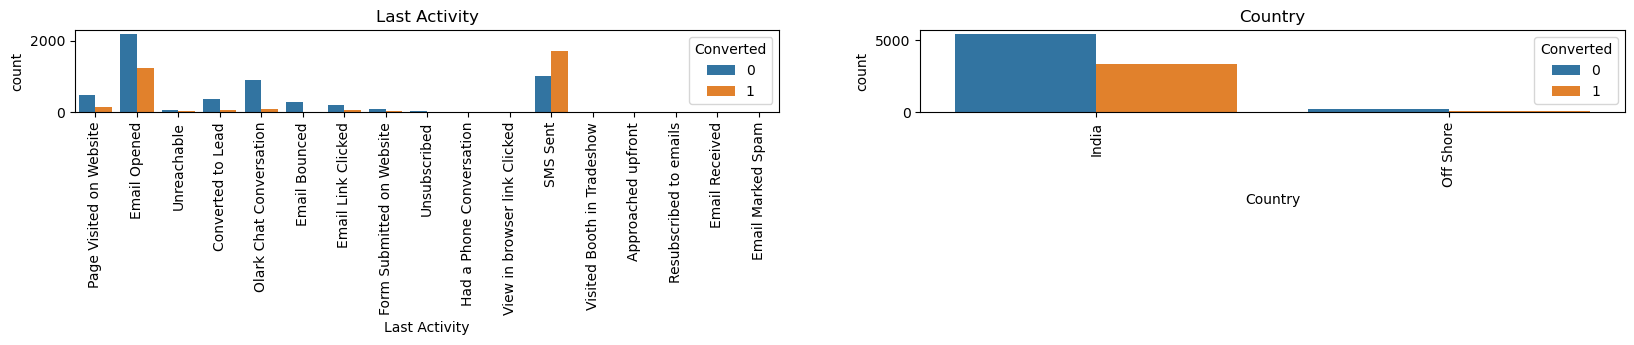

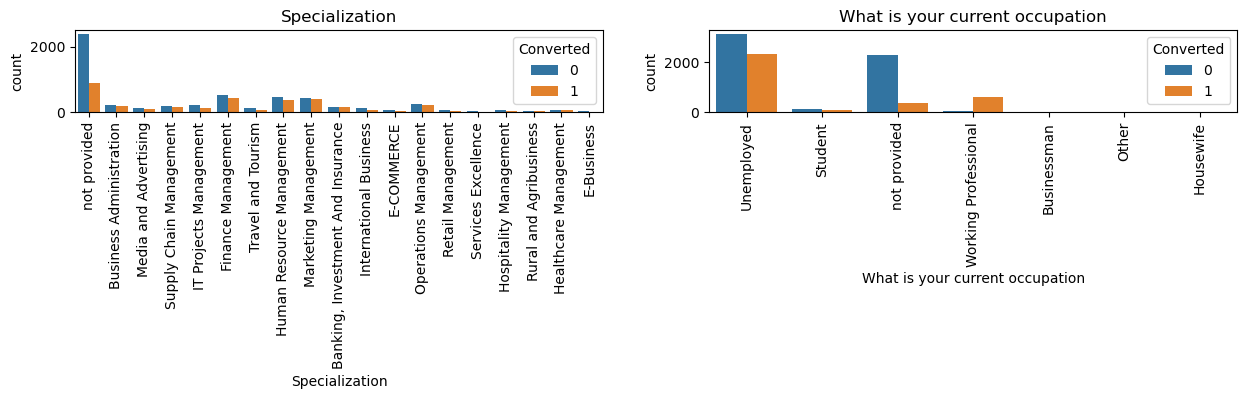

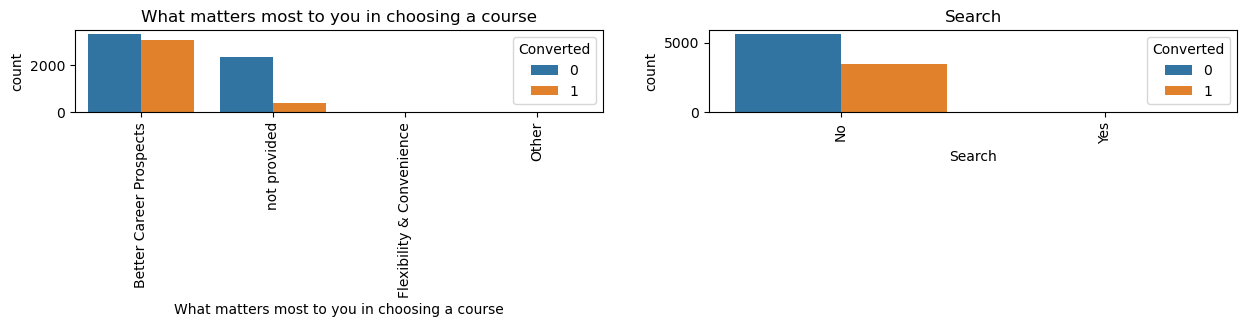

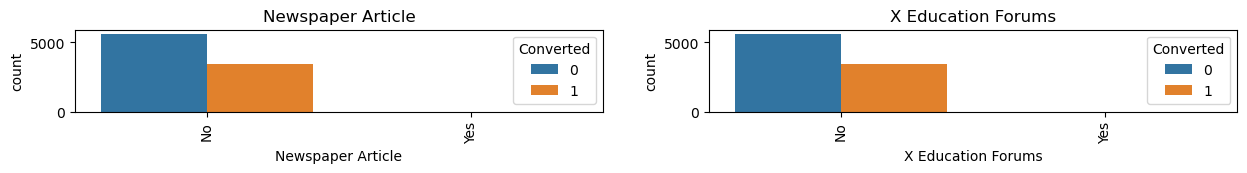

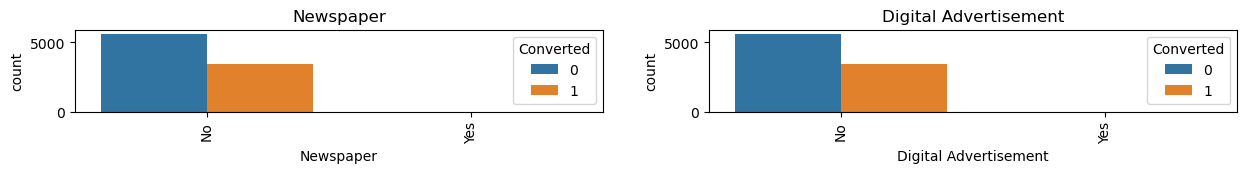

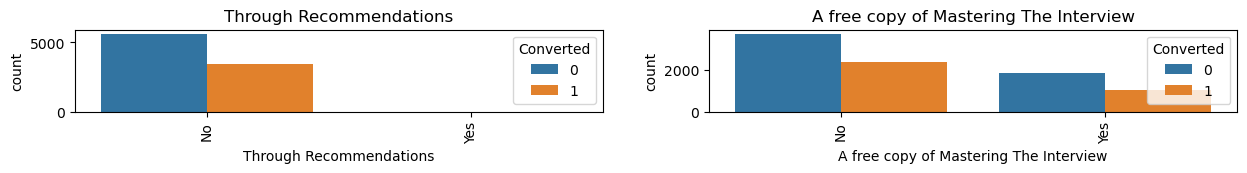

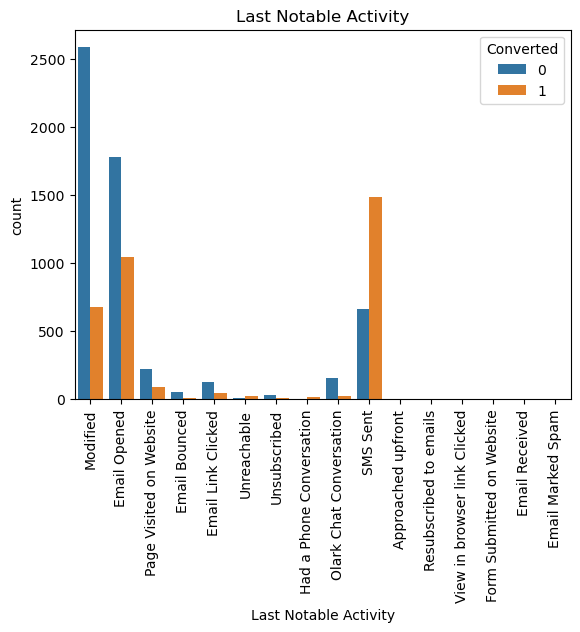

In [39]:
plt.figure(figsize = (15,10))

plt.subplot(8,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(8,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

plt.figure(figsize = (15,10))
plt.subplot(8,2,3)
sns.countplot(x='Do Not Email', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(8,2,4)
sns.countplot(x='Do Not Call', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

plt.figure(figsize = (20,10))
plt.subplot(8,2,5)
sns.countplot(x='Last Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(8,2,6)
sns.countplot(x='Country', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

plt.figure(figsize = (15,10))
plt.subplot(8,2,7)
sns.countplot(x='Specialization', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(8,2,8)
sns.countplot(x='What is your current occupation', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

plt.figure(figsize = (15,10))
plt.subplot(8,2,9)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(8,2,10)
sns.countplot(x='Search', hue='Converted', data=df).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

plt.figure(figsize = (15,10))
plt.subplot(8,2,11)
sns.countplot(x='Newspaper Article', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(8,2,12)
sns.countplot(x='X Education Forums', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

plt.figure(figsize = (15,10))
plt.subplot(8,2,13)
sns.countplot(x='Newspaper', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(8,2,14)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

plt.figure(figsize = (15,10))
plt.subplot(8,2,15)
sns.countplot(x='Through Recommendations', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(8,2,16)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

sns.countplot(x='Last Notable Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

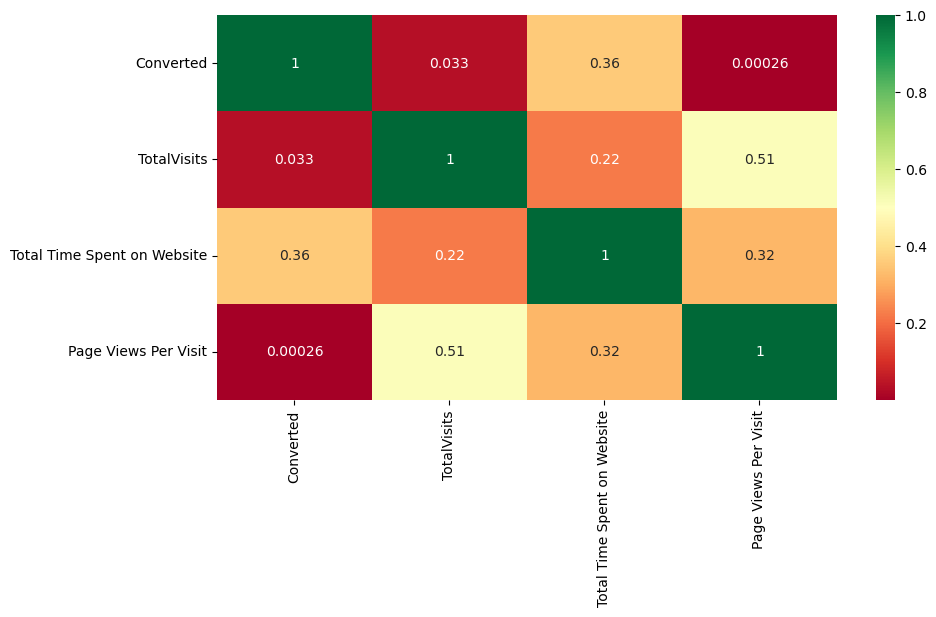

In [40]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes(include=['number']).corr() , cmap="RdYlGn",annot=True)  # Only numeric columns
plt.show()

In [41]:
df_ = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
df_.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


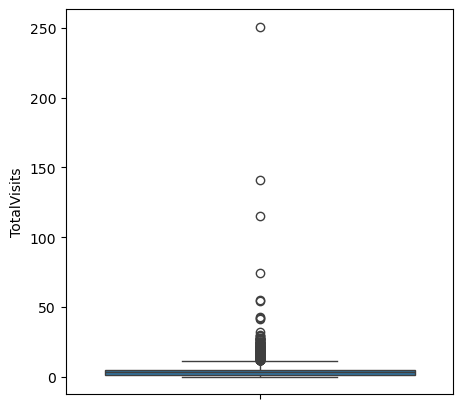

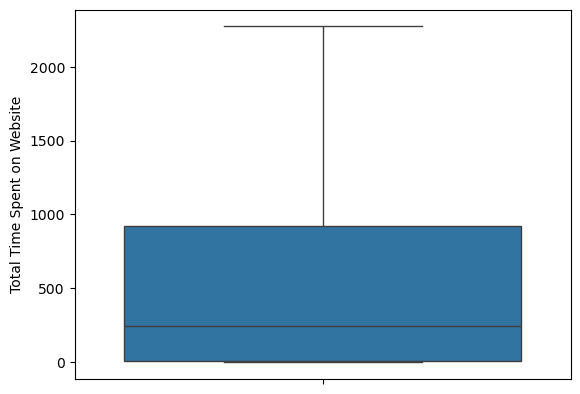

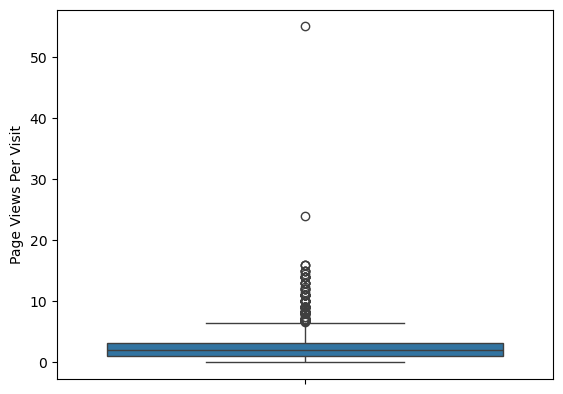

In [42]:
plt.figure(figsize = (5,5))
sns.boxplot(y=df['TotalVisits'])
plt.show()

sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

sns.boxplot(y=df['Page Views Per Visit'])
plt.show()


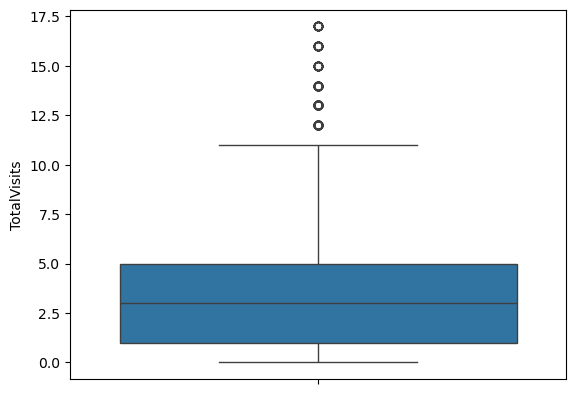

In [43]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
Lead_data = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [44]:
#list of columns to be dropped
cols_to_drop=['Country','Tags']

#e can drop "Tags" ,As tags variable is generated by the sales sales team after the disscussion with student 


In [45]:
#dropping columns
df = df.drop(cols_to_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8991 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Specialization                                 8991 non-n

In [46]:
#getting a list of categorical columns

df_cols= df.select_dtypes(include=['object']).columns
df_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [47]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_dum = pd.concat([df, dummy], axis=1)
df_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,not provided,...,False,False,True,False,False,False,False,False,False,False
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,not provided,...,False,False,False,False,False,False,False,False,False,False
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,False,False,False,False,False,False,False,False,False,False
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,...,False,False,True,False,False,False,False,False,False,False
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,not provided,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,False,False,False,False,False,False,False,False,False,False
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,False,False,False,False,False,False,True,False,False,False
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,...,False,False,False,False,False,False,True,False,False,False
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,False,False,False,False,False,False,True,False,False,False


In [48]:
df_dum = df_dum.drop(['City','What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)
df_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.50,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1,2.0,1428,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9236,0,2.0,238,2.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9237,0,2.0,199,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
9238,1,3.0,499,3.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [49]:
df = pd.DataFrame(df_dum)
df.head()

df = df.apply(lambda x: x.astype(int) if x.dtype == bool else x)
df

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<h2> <span style='color:DarkBlue ;'> Step-2: Model Building </span> </h2>

In [51]:
X = df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
# Putting the target variable in y
y = df['Converted']
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [53]:
# Split the dataset into 70% and 30% for train and test respectively

 #Import the required library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [54]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [55]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3523,0.117647,0.057218,0.0625,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3267,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5653,0.117647,0.404049,0.1250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5072,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3704,0.235294,0.043134,0.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Import RFE
from sklearn.feature_selection import RFE

# Running RFE with 15 variables as output
rfe = RFE(estimator=lr, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

# Selecting columns selected by RFE
X_train = X_train[col]

# Importing statsmodels
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.8
Date:                Tue, 18 Mar 2025   Deviance:                       5149.5
Time:                        21:03:17   Pearson chi2:                 6.53e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3981
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3993      0.101      3.949      0.000       0.201       0.598
TotalVisits                                              1.9397      0.300      6.462      0.000       1.351       2.528
Total Time Spent on Website                              4.6939      0.170     27.582      0.000       4.360       5.027
Page Views Per Visit                                    -2.0213      0.444     -4.558      0.000      -2.891      -1.152
Lead Origin_Lead Add Form                                3.0474      0.256     11.902      0.000       2.546       3.549
Lead Source_Direct Traffic                              -1.5381      0.132    -11.618      0.000      -1.798      -1.279
Lead Source_Google                                      -1.1086      0.129     -8.573      0.000      -1.362      -0.855
Lead Source_Organic Search                              -1.4319      0.165     -8.678      0.000      -1.755      -1.108
Lead Source_Referral Sites                              -1.3491      0.334     -4.043      0.000      -2.003      -0.695
Lead Source_Welingak Website                             2.4666      1.039      2.373      0.018       0.429       4.504
Do Not Email_Yes                                        -1.4317      0.206     -6.936      0.000      -1.836      -1.027
Last Activity_Email Bounced                             -1.1133      0.396     -2.813      0.005      -1.889      -0.338
Last Activity_Olark Chat Conversation                   -1.3015      0.193     -6.731      0.000      -1.680      -0.922
What is your current occupation_Housewife               22.3590   1.75e+04      0.001      0.999   -3.43e+04    3.43e+04
What is your current occupation_Other                    1.0698      0.756      1.415      0.157      -0.412       2.552
What is your current occupation_Working Professional     2.7816      0.191     14.535      0.000       2.407       3.157
Last Notable Activity_Email Link Clicked                -2.0752      0.266     -7.791      0.000      -2.597      -1.553
Last Notable Activity_Email Opened                      -1.4387      0.090    -16.000      0.000      -1.615      -1.262
Last Notable Activity_Modified                          -1.8582      0.099    -18.753      0.000      -2.052      -1.664
Last Notable Activity_Olark Chat Conversation           -1.6235      0.372     -4.360      0.000      -2.353      -0.894
Last Notable Activity_Page Visited on Website           -2.1400      0.216     -9.901      0.000      -2.564      -1.716
========================================================================================================================
"""

In [57]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.32
0,TotalVisits,5.50
5,Lead Source_Google,3.56
4,Lead Source_Direct Traffic,3.15
6,Lead Source_Organic Search,2.43
1,Total Time Spent on Website,2.35
17,Last Notable Activity_Modified,2.34
9,Do Not Email_Yes,1.92
10,Last Activity_Email Bounced,1.86
11,Last Activity_Olark Chat Conversation,1.77


In [58]:
# The VIF values seem fine but some p-values are 99 %. So removing 
# ' What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'.

X_train.drop(['What is your current occupation_Housewife'], axis = 1, inplace = True)

In [59]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.1
Date:                Tue, 18 Mar 2025   Deviance:                       5156.3
Time:                        21:03:18   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3975
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3969      0.101      3.927      0.000       0.199       0.595
TotalVisits                                              1.9288      0.300      6.428      0.000       1.341       2.517
Total Time Spent on Website                              4.6972      0.170     27.612      0.000       4.364       5.031
Page Views Per Visit                                    -2.0139      0.443     -4.542      0.000      -2.883      -1.145
Lead Origin_Lead Add Form                                3.0741      0.256     12.024      0.000       2.573       3.575
Lead Source_Direct Traffic                              -1.5346      0.132    -11.601      0.000      -1.794      -1.275
Lead Source_Google                                      -1.1048      0.129     -8.548      0.000      -1.358      -0.852
Lead Source_Organic Search                              -1.4309      0.165     -8.675      0.000      -1.754      -1.108
Lead Source_Referral Sites                              -1.3486      0.334     -4.042      0.000      -2.003      -0.695
Lead Source_Welingak Website                             2.4397      1.039      2.347      0.019       0.403       4.477
Do Not Email_Yes                                        -1.4338      0.206     -6.944      0.000      -1.839      -1.029
Last Activity_Email Bounced                             -1.1130      0.396     -2.812      0.005      -1.889      -0.337
Last Activity_Olark Chat Conversation                   -1.3036      0.193     -6.743      0.000      -1.683      -0.925
What is your current occupation_Other                    1.0673      0.756      1.411      0.158      -0.415       2.550
What is your current occupation_Working Professional     2.7783      0.191     14.518      0.000       2.403       3.153
Last Notable Activity_Email Link Clicked                -2.0619      0.265     -7.795      0.000      -2.580      -1.543
Last Notable Activity_Email Opened                      -1.4354      0.090    -15.969      0.000      -1.612      -1.259
Last Notable Activity_Modified                          -1.8545      0.099    -18.726      0.000      -2.049      -1.660
Last Notable Activity_Olark Chat Conversation           -1.6197      0.372     -4.349      0.000      -2.350      -0.890
Last Notable Activity_Page Visited on Website           -2.1382      0.216     -9.893      0.000      -2.562      -1.715
========================================================================================================================
"""

In [60]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.32
0,TotalVisits,5.50
5,Lead Source_Google,3.56
4,Lead Source_Direct Traffic,3.15
6,Lead Source_Organic Search,2.43
1,Total Time Spent on Website,2.35
16,Last Notable Activity_Modified,2.34
9,Do Not Email_Yes,1.92
10,Last Activity_Email Bounced,1.86
11,Last Activity_Olark Chat Conversation,1.77


In [61]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [62]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2588.6
Date:                Tue, 18 Mar 2025   Deviance:                       5177.2
Time:                        21:03:18   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3955
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3588      0.100      3.571      0.000       0.162       0.556
TotalVisits                                              1.1635      0.249      4.675      0.000       0.676       1.651
Total Time Spent on Website                              4.6799      0.170     27.582      0.000       4.347       5.012
Lead Origin_Lead Add Form                                3.0879      0.256     12.078      0.000       2.587       3.589
Lead Source_Direct Traffic                              -1.7002      0.128    -13.328      0.000      -1.950      -1.450
Lead Source_Google                                      -1.2806      0.124    -10.351      0.000      -1.523      -1.038
Lead Source_Organic Search                              -1.6655      0.157    -10.612      0.000      -1.973      -1.358
Lead Source_Referral Sites                              -1.5500      0.333     -4.661      0.000      -2.202      -0.898
Lead Source_Welingak Website                             2.4403      1.040      2.348      0.019       0.403       4.478
Do Not Email_Yes                                        -1.4671      0.205     -7.149      0.000      -1.869      -1.065
Last Activity_Email Bounced                             -1.0273      0.393     -2.611      0.009      -1.799      -0.256
Last Activity_Olark Chat Conversation                   -1.2842      0.193     -6.645      0.000      -1.663      -0.905
What is your current occupation_Other                    1.1485      0.746      1.540      0.124      -0.313       2.610
What is your current occupation_Working Professional     2.7723      0.191     14.502      0.000       2.398       3.147
Last Notable Activity_Email Link Clicked                -2.0151      0.263     -7.669      0.000      -2.530      -1.500
Last Notable Activity_Email Opened                      -1.4079      0.089    -15.755      0.000      -1.583      -1.233
Last Notable Activity_Modified                          -1.8262      0.099    -18.522      0.000      -2.019      -1.633
Last Notable Activity_Olark Chat Conversation           -1.5355      0.368     -4.168      0.000      -2.258      -0.813
Last Notable Activity_Page Visited on Website           -1.9525      0.209     -9.320      0.000      -2.363      -1.542
========================================================================================================================
"""

In [63]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,3.68
4,Lead Source_Google,3.09
3,Lead Source_Direct Traffic,2.77
1,Total Time Spent on Website,2.35
15,Last Notable Activity_Modified,2.34
5,Lead Source_Organic Search,2.10
8,Do Not Email_Yes,1.91
9,Last Activity_Email Bounced,1.85
10,Last Activity_Olark Chat Conversation,1.77
14,Last Notable Activity_Email Opened,1.70


In [64]:
# All the VIF values are good and all the p-values are below 0.05. So we can fit model.

# Prediction

In [66]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3523    0.256785
3267    0.997232
5653    0.327069
5072    0.259404
3704    0.135400
1790    0.116534
2482    0.180057
1694    0.187336
8768    0.119173
9225    0.004620
dtype: float64

In [67]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.25678451, 0.99723243, 0.32706866, 0.25940449, 0.13539978,
       0.11653366, 0.18005719, 0.18733639, 0.1191733 , 0.00462024])

In [68]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.256785
1,1,0.997232
2,1,0.327069
3,0,0.259404
4,0,0.135400


In [69]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.256785,0
1,1,0.997232,1
2,1,0.327069,0
3,0,0.259404,0
4,0,0.135400,0


# Model Evaluation

In [71]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3480,  435],
       [ 707, 1671]], dtype=int64)

In [72]:
# Predicted        No         Yes
# Actual
# No              3498      417
# Yes             837      1541

In [73]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

# That's around 81.8% accuracy with is a very good value

0.8185285237565549

In [74]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [75]:
# Calculating the sensitivity
TP/(TP+FN)

0.7026913372582002

In [76]:
# Calculating the specificity
TN/(TN+FP)

# With the current cut off as 0.5 we have around 82% accuracy, sensitivity of around 70% and specificity of around 88%.

0.8888888888888888

# Optimise Cut off (ROC Curve)

In [78]:
# he previous cut off was randomely selected. Now to find the optimum one

# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

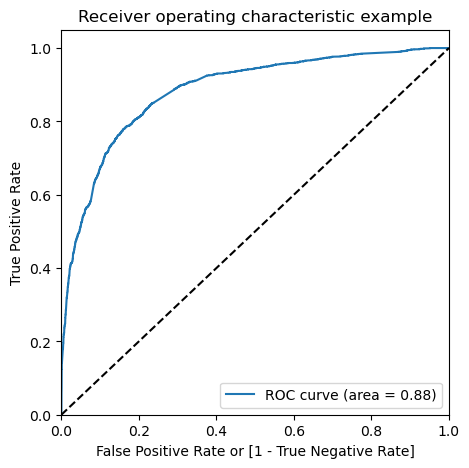

In [80]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

# The area under ROC curve is 0.88 which is a very good value

In [81]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.256785,0,1,1,1,0,0,0,0,0,0,0
1,1,0.997232,1,1,1,1,1,1,1,1,1,1,1
2,1,0.327069,0,1,1,1,1,0,0,0,0,0,0
3,0,0.259404,0,1,1,1,0,0,0,0,0,0,0
4,0,0.135400,0,1,1,0,0,0,0,0,0,0,0


In [82]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377880,1.000000,0.000000
0.1,0.1,0.606229,0.960892,0.390805
0.2,0.2,0.757667,0.908326,0.666156
0.3,0.3,0.801208,0.830109,0.783653
0.4,0.4,0.816939,0.769975,0.845466
0.5,0.5,0.818529,0.702691,0.888889
0.6,0.6,0.794375,0.574012,0.928225
0.7,0.7,0.782616,0.502103,0.953001
0.8,0.8,0.763547,0.421783,0.971137
0.9,0.9,0.717464,0.269554,0.989527


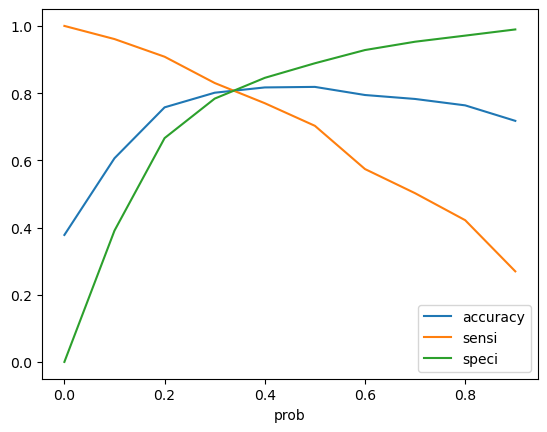

In [83]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# From the graph it is visible that the optimal cut off is at 0.35.

In [84]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.256785,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.997232,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.327069,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.259404,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.135400,0,1,1,0,0,0,0,0,0,0,0,0


In [85]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8088352137295408

In [86]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3189,  726],
       [ 477, 1901]], dtype=int64)

In [87]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]


In [88]:
# Calculating the sensitivity
TP/(TP+FN)

0.7994112699747687

In [89]:
# Calculating the specificity
TN/(TN+FP)

0.8145593869731801

Inference: With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

# Prediction on Test set

In [92]:
 #Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [93]:
col = X_train.columns

In [94]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Other,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3308,1.0,0.117647,0.050176,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4421,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8855,1.0,0.058824,0.547975,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5302,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2169,1.0,0.588235,0.390405,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,1.0,0.058824,0.218310,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7836,1.0,0.588235,0.227113,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
8378,1.0,0.588235,0.179577,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1263,1.0,0.117647,0.376320,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [95]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.123687
1,1,0.588757
2,1,0.369421
3,0,0.059994
4,0,0.440834


In [96]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.123687,0
1,1,0.588757,1
2,1,0.369421,1
3,0,0.059994,0
4,0,0.440834,1
...,...,...,...
2693,1,0.111303,0
2694,1,0.829587,1
2695,0,0.039110,0
2696,1,0.965408,1


In [97]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7994810971089696

In [98]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1349,  328],
       [ 213,  808]], dtype=int64)

In [99]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [100]:
# Calculating the sensitivity
TP/(TP+FN)

0.791380999020568

In [101]:
# Calculating the specificity
TN/(TN+FP)

0.8044126416219439

Inference : With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

## Precision-Recall

In [104]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3480,  435],
       [ 707, 1671]], dtype=int64)

In [105]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7934472934472935

In [106]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7026913372582002

Inference: With the current cut off as 0.35 we have Precision around 79% and Recall around 70%

### Precision and recall tradeoff

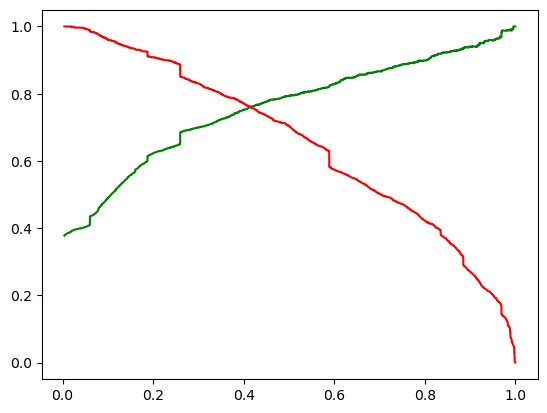

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.256785,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.997232,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.327069,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.259404,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.135400,0,1,1,0,0,0,0,0,0,0,0,0


In [109]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.Predicted

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

In [110]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8182107103130463

In [111]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3333,  582],
       [ 562, 1816]], dtype=int64)

In [112]:

# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [113]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7572977481234362

In [114]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7636669470142977

Inference: With the current cut off as 0.44 we have Precision around 76% and Recall around 76.3% and accuracy 82 %.

## Prediction on Test set

In [117]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.123687
1,1,0.588757
2,1,0.369421
3,0,0.059994
4,0,0.440834


In [118]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.123687,0
1,1,0.588757,1
2,1,0.369421,0
3,0,0.059994,0
4,0,0.440834,1
...,...,...,...
2693,1,0.111303,0
2694,1,0.829587,1
2695,0,0.039110,0
2696,1,0.965408,1


### Check the overall accuracy

In [120]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8050407709414381

In [121]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1425,  252],
       [ 274,  747]], dtype=int64)

In [122]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [123]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7477477477477478

In [124]:

#Recall = TP / TP + FN
TP / (TP + FN)

0.7316356513222331

Inference: Current cut off as 0.41 we have Precision around 75% , Recall around 73% and accuracy 80.5%.
Inference: The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

## Conclusion

The variables that mattered the most in the potential "hot leads" are (In descending order) : 
    -- TotalVisits 
    -- The total time spend on the Website 
    -- Lead Origin_Lead Add Form 
    -- Lead Source_Direct Traffic 
    -- Lead Source_Google
    -- Lead Source_Welingak Website 
    -- Lead Source_Organic Search 
    -- Lead Source_Referral Sites 
    -- Lead Source_Welingak Website 
    -- Do Not Email_Yes 
    -- Last Activity_Email Bounced 
    -- Last Activity_Olark Chat Conversation